In [1]:
import pandas as pd
import sklearn
import numpy as np
import math
import string
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
import pylab as pl

df = pd.read_csv(r'Downloads\JetNtuple_RunIISummer16_13TeV_MC_csv_100k_2.csv')

In [8]:
dfqg = df[(df.isPhysG==1) | (df.isPhysUDS==1)].reset_index()
dfqg=dfqg.drop(['index','EventNum' ], axis=1)
pd.set_option('display.max_columns', 100)
dfqg.head(25)

,Unnamed: 0,jetPt,jetEta,jetPhi,jetMass,jetGirth,jetArea,jetRawPt,jetRawMass,jetLooseID,jetTightID,jetGenMatch,jetQGl,QG_ptD,QG_axis2,QG_mult,partonFlav,hadronFlav,physFlav,isPhysUDS,isPhysG,isPhysOther,isPartonUDS,isPartonG,isPartonOther,jetChargedHadronMult,jetNeutralHadronMult,jetChargedMult,jetNeutralMult,jetMult,nPF,PF_pT,PF_dR,PF_dTheta,PF_dPhi,PF_dEta,PF_mass,PF_id,PF_fromPV,PF_fromAK4Jet,genJetPt,genJetEta,genJetPhi,genJetMass,nGenJetPF,genJetPF_pT,genJetPF_dR,genJetPF_dTheta,genJetPF_mass,genJetPF_id,eventJetMult,jetPtOrder,dPhiJetsLO,dEtaJetsLO,alpha,event,run,lumi,pthat,eventWeight,rhoAll,rhoCentral,rhoCentralNeutral,rhoCentralChargedPileUp,PV_npvsGood,Pileup_nPU,Pileup_nTrueInt
0,0,201.199550,-0.455842,-1.927541,20.587746,0.041613,0.488692,191.304140,19.575197,1,1,1,0.978515,0.489665,0.009762,16,-2,0,-2,1,0,0,1,0,0,14,0,14,12,26,109,[ 1.8154297 1.2822266 3.7207031 3.03125 ...,[1.0493158 0.51397204 0.289036 0.03030716 0...,[ 0.72416794 -0.6175661 -0.3974595 0.444518...,[ 6.95184708e-01 -2.97616839e-01 -1.11879230e-...,[ 0.78599095 0.4190364 0.26650488 0.027361...,[ 1.3952637e-01 1.3952637e-01 1.3952637e-01 ...,[ 211 211 -211 -211 -211 211 211 -211 -211 ...,[3 3 3 3 3 3 3 3 2 2 0 0 0 0 0 0 0 0 0 0 0 1 0...,[0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0...,201.982960,-0.452516,-1.926215,20.592997,27,[38.15625 37.90625 28.078125 23.328125...,[0.00902054 0.00931706 0.01466413 0.00629412 0...,[-2.2449236 3.06987 -1.937795 1.708994...,[ 1.3952637e-01 1.3952637e-01 -2.3841858e-07 ...,[ -211 211 22 22 22 22 211 -2...,3,0,2.585887,-0.470722,0.592001,2063618,1,10749,333.959720,8.630000e-07,12.192383,12.626963,1.784393,8.661064,15,17,14.003437
1,3,1263.015700,0.024581,-1.778938,65.909690,0.019175,0.498665,1196.449300,62.435963,1,1,1,0.980843,0.464368,0.005259,21,-1,0,-1,1,0,0,1,0,0,15,5,15,9,24,57,[3.63476562e+00 3.75976562e+00 1.06933594e+00 ...,[0.40648416 0.14637692 0.53210837 0.28929234 0...,[ 0.7316456 0.6776594 -1.3794131 -1.355993...,[ 0.27157003 0.09177413 -0.52239317 -0.282643...,[ 0.3024551 0.11403382 0.10121605 0.061664...,[ 1.3952637e-01 1.3952637e-01 1.3952637e-01 ...,[-211 -211 211 211 211 -211 211 -211 -211 ...,[3 3 3 3 3 3 3 2 3 2 2 2 2 2 1 1 0 1 3 3 2 2 2...,[0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0...,1230.496300,0.019065,-1.781667,36.297882,26,[4.32000000e+02 1.36500000e+02 1.12500000e+02 ...,[0.00738081 0.00692464 0.00569316 0.00853607 0...,[ 1.3485683 -2.3331108 -0.5262823 2.218214...,[ 4.9365234e-01 1.3952637e-01 1.3952637e-01 ...,[-321 211 -211 -211 130 211 130 -211 321 ...,4,0,2.961258,0.626809,0.477828,2063617,1,10749,953.220700,7.690000e-09,3.713232,4.643364,0.000000,2.627680,9,11,10.769351
2,12,82.229380,-1.320099,-2.670095,15.429768,0.134551,0.508639,75.368790,14.142426,1,1,1,0.002463,0.277553,0.070929,25,21,0,21,0,1,0,0,1,0,18,2,18,21,39,146,[ 1.7880859 1.1904297 1.5185547 4.34375 ...,[0.59618616 0.5022531 0.36156008 0.14491841 0...,[ 0.7709469 0.8441528 -0.54715025 0.315834...,[ 0.4154313 0.3753883 -0.18810368 0.045013...,[ 0.42761523 0.33367926 0.30877614 0.137750...,[ 1.3952637e-01 1.3952637e-01 1.3952637e-01 ...,[ 211 -211 211 211 -211 211 211 -211 -211 ...,[3 3 3 2 3 3 3 3 2 3 3 2 3 2 2 0 0 0 0 0 1 0 1...,[0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0...,76.315570,-1.327128,-2.680369,13.124958,27,[13.40625 12.65625 5.7226562 5.007812...,[0.03176612 0.03377973 0.15334162 0.08610515 0...,[-2.5777044 1.2143203 -0.6682337 2.720798...,[ 4.9755859e-01 1.3952637e-01 1.3952637e-01 ...,[ 310 211 -211 -211 22 211 -211 211 22 ...,3,0,2.748459,-1.369172,0.466182,2063623,1,10749,52.266624,3.634132e-03,20.798702,24.020477,4.898797,14.185976,25,35,26.679888
3,13,48.539627,0.049073,0.864631,12.076053,0.213575,0.498665,49.997986,12.438873,1,1,1,0.028400,0.321609,0.114792,16,21,0,21,0,1,0,0,1,0,17,0,17,9,26,184,[2.1015625 1.6992188 3.1152344 3.3066406 2...,[0.5123496 0.49553227 0.28382164 0.2360376 0...,[-0.9616224 0.9486994 -0.31651402 0.007620...,[-0.42018867 0.40269843 -0.08834109 0.001798...,[ 0.293161

In [42]:
from sklearn.model_selection import train_test_split
SEED=12
train, test = train_test_split(dfqg, test_size=0.2, random_state=SEED)

train_y = train.isPhysG
test_y = test.isPhysG


In [43]:
features= ['jetPt', 'jetEta', 'jetPhi', 'jetMass', 'jetGirth', 'jetArea', 'jetQGl',
       'QG_ptD', 'QG_axis2', 'QG_mult', 'jetChargedHadronMult',
       'jetNeutralHadronMult', 'jetChargedMult', 'jetNeutralMult', 'jetMult',
       'nPF', 'dPhiJetsLO', 'dEtaJetsLO']
train_x = train[features]
test_x = test[features]
train_x

,jetPt,jetEta,jetPhi,jetMass,jetGirth,jetArea,jetQGl,QG_ptD,QG_axis2,QG_mult,jetChargedHadronMult,jetNeutralHadronMult,jetChargedMult,jetNeutralMult,jetMult,nPF,dPhiJetsLO,dEtaJetsLO
29729,452.375340,-0.209956,2.838991,29.887484,0.026880,0.508639,0.989681,0.433086,0.007396,16,19,3,19,7,26,139,-2.988846,-0.076987
43817,228.605640,0.197099,1.530630,48.165466,0.193548,0.688158,0.615608,0.419146,0.015394,21,16,5,16,17,33,140,-2.713622,-1.263397
48604,541.208900,-0.658036,-2.685943,33.678074,0.015358,0.528585,0.999264,0.628013,0.003022,14,17,1,17,10,27,148,3.122181,0.365483
7074,246.241180,1.196961,2.569545,24.951660,0.050629,0.508639,0.224866,0.284870,0.017903,23,27,1,27,18,45,255,2.841763,-2.030725
6012,49.803886,-1.220058,1.159904,12.129569,0.190430,0.478719,0.003180,0.295662,0.129689,15,11,3,12,15,27,117,2.711074,-1.864171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36482,56.763523,0.965887,1.243389,7.965054,0.092423,0.538559,0.994837,0.629440,0.013713,5,5,0,6,5,11,135,-2.766028,2.766919
40177,881.653000,-0.848054,-2.177413,123.051125,0.123600,0.468746,0.542437,0.392836,0.011865,29,23,3,23,15,38,98,2.952833,0.908377
19709,325.787320,1.314846,2.015896,31.496060,0.050753,0.478719,0.138807,0.302492,0.020686,31,16,4,16,29,45,134,-2.886992,0.494477
38555,124.082820,0.088719,-0.602404,21.358173,0.136085,0.498665,0.007519,0.276686,0.065313,26,19,1,20,16,36,114,3.127530,0.276174


In [44]:
#Since these feattures are on very different scales, we have to scale or normalize the features
train_x_mean = train_x.mean()
train_x_std = train_x.std()

train_x = (train_x - train_x_mean) / train_x_std
test_x = (test_x - train_x_mean) / train_x_std
train_x

,jetPt,jetEta,jetPhi,jetMass,jetGirth,jetArea,jetQGl,QG_ptD,QG_axis2,QG_mult,jetChargedHadronMult,jetNeutralHadronMult,jetChargedMult,jetNeutralMult,jetMult,nPF,dPhiJetsLO,dEtaJetsLO
29729,0.238151,-0.178269,1.571063,-0.219709,-1.161899,0.211502,1.444217,0.186099,-0.891083,-0.657859,-0.038765,0.476531,-0.057262,-1.058859,-0.601296,0.111349,-1.002492,-0.046873
43817,-0.389784,0.163595,0.848566,0.367015,2.577641,7.006988,0.479396,0.074352,-0.516663,-0.232236,-0.361128,1.732307,-0.378912,0.168508,-0.141848,0.133797,-0.909692,-0.821935
48604,0.487433,-0.554589,-1.479888,-0.098031,-1.420421,0.966557,1.468935,1.748592,-1.095882,-0.828108,-0.253674,-0.779244,-0.271695,-0.690649,-0.535661,0.313376,1.058033,0.242186
7074,-0.340296,1.003329,1.422270,-0.378149,-0.629045,0.211502,-0.528420,-1.001974,-0.399221,-0.061986,0.820872,-0.779244,0.800473,0.291245,0.645777,2.715245,0.963481,-1.323218
6012,-0.891531,-1.026603,0.643846,-0.789739,2.507683,-0.921078,-1.100200,-0.915466,4.834155,-0.742984,-0.898401,0.476531,-0.807779,-0.076965,-0.535661,-0.382493,0.919415,-1.214412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36482,-0.872001,0.809261,0.689947,-0.923420,0.308683,1.344082,1.457515,1.760027,-0.595374,-1.594231,-1.543129,-1.407132,-1.451080,-1.304333,-1.585828,0.021560,-0.927362,1.811005
40177,1.442776,-0.714175,-1.199070,2.770847,1.008204,-1.298605,0.290669,-0.136540,-0.681864,0.448762,0.391054,0.476531,0.371606,-0.076965,0.186329,-0.808993,1.000932,0.596849
19709,-0.117076,1.102335,1.116537,-0.168074,-0.626270,-0.921078,-0.750387,-0.860714,-0.268924,0.619011,-0.361128,1.104419,-0.378912,1.641349,0.645777,-0.000887,-0.968149,0.326455
38555,-0.683092,0.072573,-0.329327,-0.493500,1.288333,-0.166024,-1.089009,-1.067572,1.820321,0.193388,-0.038765,-0.779244,0.049955,0.045772,0.055058,-0.449835,1.059837,0.183841


In [45]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((39107, 18), (9777, 18), (39107,), (9777,))

In [161]:
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Dropout
#import tensorflow as tf
#import keras.backend as K
from tensorflow.python.keras import backend as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from keras.utils import to_categorical

In [196]:
model = Sequential()
model.add(Dense(100, kernel_initializer='normal', activation='relu', input_dim=train_x.shape[1]))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(optimizer='Nadam', loss='binary_crossentropy', metrics=['accuracy'])

# Weight the training samples so that there is equal weight on gluon and quark jets
# even if there are different amount of them in the training set
#class_weights = class_weight.compute_class_weight('balanced', np.unique(train_y), train_y[:])

# Train the model
# model.fit(train_x,
#           train_y,
#           epochs=20,
#           batch_size=128,
#           validation_split=0.2,
#           shuffle=True,
#           verbose=1)

Train on 31285 samples, validate on 7822 samples
Epoch 1/40
31285/31285 [==============================] - 2s 54us/sample - loss: 0.5084 - accuracy: 0.7576 - val_loss: 0.4843 - val_accuracy: 0.7744
Epoch 2/40
31285/31285 [==============================] - 1s 24us/sample - loss: 0.4772 - accuracy: 0.7742 - val_loss: 0.4872 - val_accuracy: 0.7695
Epoch 3/40
31285/31285 [==============================] - 1s 24us/sample - loss: 0.4737 - accuracy: 0.7770 - val_loss: 0.4811 - val_accuracy: 0.7747
Epoch 4/40
31285/31285 [==============================] - 1s 25us/sample - loss: 0.4712 - accuracy: 0.7785 - val_loss: 0.4780 - val_accuracy: 0.7769
Epoch 5/40
31285/31285 [==============================] - 1s 25us/sample - loss: 0.4698 - accuracy: 0.7808 - val_loss: 0.4796 - val_accuracy: 0.7786
Epoch 6/40
31285/31285 [==============================] - 1s 26us/sample - loss: 0.4687 - accuracy: 0.7800 - val_loss: 0.4826 - val_accuracy: 0.7673
Epoch 7/40
31285/31285 [==============================] -

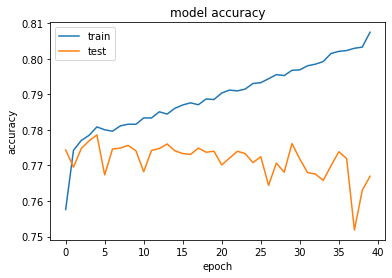

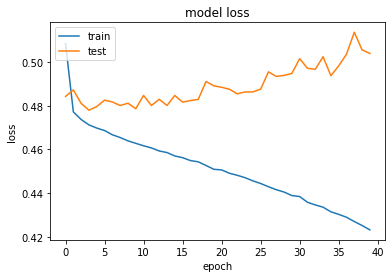

In [197]:
history = model.fit(train_x, train_y,  class_weight= class_weights, validation_split=0.2, epochs=40, 
                    batch_size=128, shuffle=True)
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [48]:
from keras.models import load_model
model.save('simple_keras_model1.h5')
#my_model = load_model('my_model.h5')
#predictions = my_model.predict(data_to_predict_with)
# prob_true = predictions[:,1]
# my_model.summary()

In [49]:
pred_y_1 = model.predict(test_x)
pd.DataFrame(pred_y_1)

,0
0,0.943724
1,0.578722
2,0.101315
3,0.971719
4,0.656649
...,...
9772,0.308331
9773,0.546641
9774,0.954573
9775,0.949520


In [208]:

from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

Text(0.5, 0, 'Keras NN output')

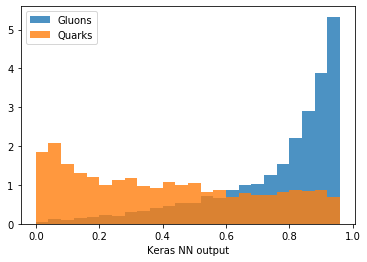

In [51]:
plt.clf()
binning = np.arange(0.0, 1.0, 0.04)
plt.hist( pred_y_1[test_y==1], bins=binning, alpha=0.8, label="Gluons", density=1 )
plt.hist( pred_y_1[test_y==0], bins=binning, alpha=0.8, label="Quarks", density=1 )
plt.legend()
plt.xlabel('Keras NN output')

Text(0.5, 0, 'Quark jet acceptance rate')

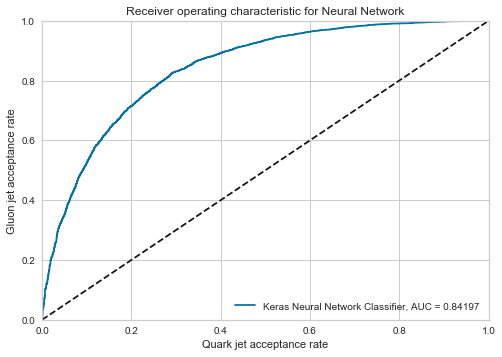

In [221]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

fpr_d1, tpr_d1, thresholds_d1  = roc_curve(test_y, pred_y_1)
roc_auc_d1 = auc(fpr_d1, tpr_d1)

plt.clf()
plt.plot(fpr_d1, tpr_d1, 'b', label='Keras Neural Network Classifier, AUC = %0.5f'% roc_auc_d1)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc = 'lower right')
plt.title("Receiver operating characteristic for Neural Network")
plt.ylabel('Gluon jet acceptance rate')
plt.xlabel('Quark jet acceptance rate')

$D^{\prime}(D)=\frac{D\left(-2 \epsilon_{q}+1\right)+\epsilon_{q}}{D\left(2 \epsilon_{g}-2 \epsilon_{q}\right)-\epsilon_{g}+\epsilon_{q}+1}$

In [218]:
eq=0.15
eg=0.25
Dp_num = pred_y_1*(-2*eq+1)+eq
Dp_den= pred_y_1*(2*eg-2*eq) - eg+eq+1
Dp=Dp_num/Dp_den
Dp[1:100]

array([[0.54650134],
       [0.24006222],
       [0.75863105],
       [0.59113413],
       [0.67317384],
       [0.743124  ],
       [0.72976404],
       [0.37236407],
       [0.33311597],
       [0.7493585 ],
       [0.55744016],
       [0.74819267],
       [0.7003336 ],
       [0.5046058 ],
       [0.38701156],
       [0.70114887],
       [0.49458262],
       [0.5888644 ],
       [0.5984364 ],
       [0.24466796],
       [0.6996137 ],
       [0.6397548 ],
       [0.51642996],
       [0.6036099 ],
       [0.7368259 ],
       [0.7025774 ],
       [0.7124556 ],
       [0.7398463 ],
       [0.43563378],
       [0.59868705],
       [0.2586337 ],
       [0.31711254],
       [0.6779452 ],
       [0.7699709 ],
       [0.552186  ],
       [0.5858061 ],
       [0.6646617 ],
       [0.7081288 ],
       [0.73434347],
       [0.39933416],
       [0.39486498],
       [0.23634434],
       [0.749034  ],
       [0.7087568 ],
       [0.7201488 ],
       [0.742444  ],
       [0.7146613 ],
       [0.710

Text(0.5, 0, 'Quark jet acceptance rate')

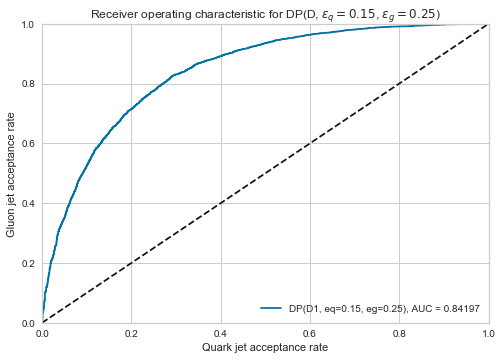

In [223]:
fpr_DP1, tpr_DP1, thresholds_DP1  = roc_curve(test_y, Dp)
roc_auc_DP1 = auc(fpr_DP1, tpr_DP1)

plt.clf()
plt.plot(fpr_DP1, tpr_DP1, 'b', label='DP(D1, eq=0.15, eg=0.25), AUC = %0.5f'% roc_auc_DP1)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc = 'lower right')
plt.title(r"Receiver operating characteristic for DP(D, $\epsilon_q=0.15$, $\epsilon_g=0.25$)")
plt.ylabel('Gluon jet acceptance rate')
plt.xlabel('Quark jet acceptance rate')

In [69]:
eq2=0.1
eg2=0.2 #if eq=eg=0.3, DP approaches infinity!
Dp2_num = pred_y_1*(-2*eq2+1)+eq2
Dp2_den= pred_y_1*(2*eg2-2*eq2) - eg2+eq2 +1
Dp2=Dp2_num/Dp2_den
Dp2

array([[0.7852888 ],
       [0.5542516 ],
       [0.19673929],
       ...,
       [0.79168284],
       [0.7887079 ],
       [0.750382  ]], dtype=float32)

Text(0.5, 0, 'Quark jet acceptance rate')

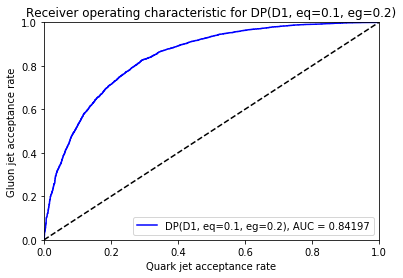

In [124]:
fpr_Dp2, tpr_Dp2, thresholds_Dp2  = roc_curve(test_y, Dp2)
roc_auc_Dp2 = auc(fpr_Dp2, tpr_Dp2)

plt.clf()
plt.plot(fpr_Dp2, tpr_Dp2, 'b', label='DP(D1, eq=0.1, eg=0.2), AUC = %0.5f'% roc_auc_Dp2)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc = 'lower right')
plt.title("Receiver operating characteristic for DP(D1, eq=0.1, eg=0.2)")
plt.ylabel('Gluon jet acceptance rate')
plt.xlabel('Quark jet acceptance rate')

Text(0.5, 0, 'Quark jet acceptance rate')

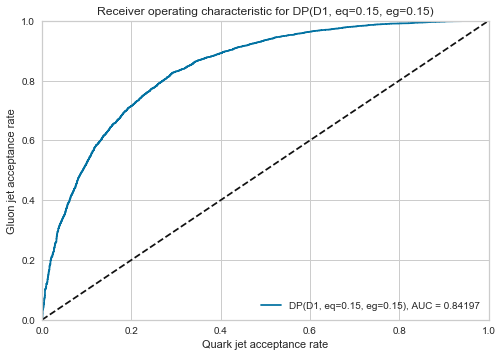

In [243]:
eq3=0.15
eg3=0.15 #if eq=eg=0.3, DP approaches infinity!
Dp3_num = pred_y_1*(-2*eq3+1) + eq3
Dp3_den= pred_y_1*(2*eg3-2*eq3) - eg3+eq3 +1
Dp3=Dp3_num/Dp3_den

fpr_Dp3, tpr_Dp3, thresholds_Dp3  = roc_curve(test_y, Dp3)
roc_auc_Dp3 = auc(fpr_Dp3, tpr_Dp3)

plt.clf()
plt.plot(fpr_Dp3, tpr_Dp3, 'b', label='DP(D1, eq=0.15, eg=0.15), AUC = %0.5f'% roc_auc_Dp3)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc = 'lower right')
plt.title("Receiver operating characteristic for DP(D1, eq=0.15, eg=0.15)")
plt.ylabel('Gluon jet acceptance rate')
plt.xlabel('Quark jet acceptance rate')

In [308]:
eq=0.15
eg=0.15
Dp_num = pred_y_b*(-2*eq+1)+eq
Dp_den= pred_y_b*(2*eg-2*eq) - eg+eq+1
Dp=Dp_num/Dp_den

No handles with labels found to put in legend.


Text(0.5, 0, 'DP(D, $\\epsilon_q=0.15$, $\\epsilon_g=0.15$)')

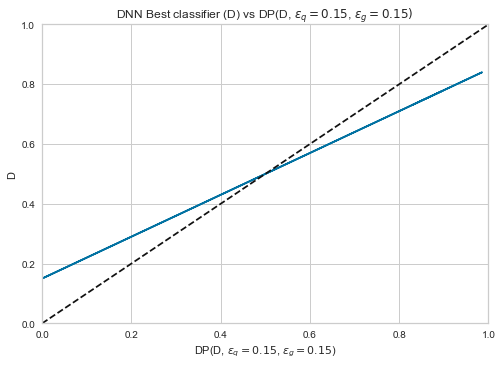

In [310]:
#plt.plot(pred_y_b, Dp5, 'b')
plt.plot(pred_y_b, Dp, 'b')
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc = 'lower right')
plt.title(r"DNN Best classifier (D) vs DP(D, $\epsilon_q=0.15$, $\epsilon_g=0.15)$ ")
plt.ylabel('D')
plt.xlabel(r'DP(D, $\epsilon_q=0.15$, $\epsilon_g=0.15$)')

Text(0.5, 0, 'Best Keras NN D')

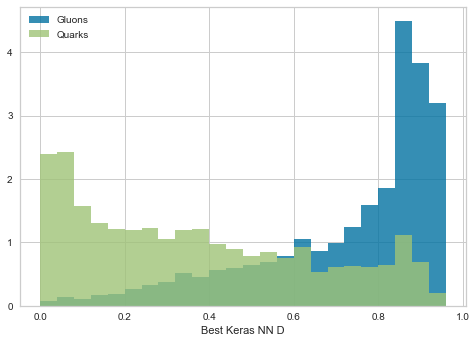

In [246]:
plt.clf()
binning = np.arange(0.0, 1.0, 0.04)
plt.hist( pred_y_b[test_y==1], bins=binning, alpha=0.8, label="Gluons", density=1 )
plt.hist( pred_y_b[test_y==0], bins=binning, alpha=0.8, label="Quarks", density=1 )
plt.legend()
plt.xlabel('Best Keras NN D')

Text(0.5, 0, 'DP(D, $\\epsilon_g=0.15$, $\\epsilon_q=0.15$)')

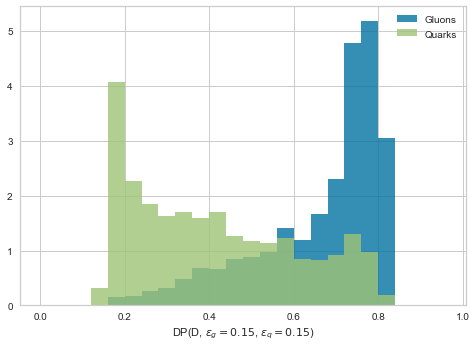

In [312]:
plt.clf()
binning = np.arange(0.0, 1.0, 0.04)
plt.hist( Dp[test_y==1], bins=binning, alpha=0.8, label="Gluons", density=1 )
plt.hist( Dp[test_y==0], bins=binning, alpha=0.8, label="Quarks", density=1 )
plt.legend()
plt.xlabel(r'DP(D, $\epsilon_g=0.15$, $\epsilon_q=0.15$)')

Text(0.5, 0, 'Quark jet acceptance rate')

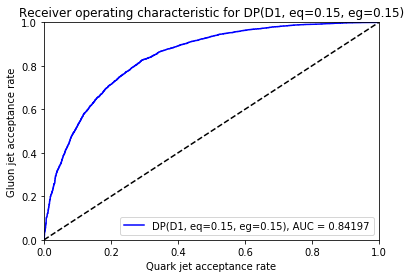

In [126]:
eq3=0.4
eg3=0.4 #if eq=eg=0.3, DP approaches infinity!
Dp3_num = pred_y_1*(-2*eq3+1) + eq3
Dp3_den= pred_y_1*(2*eg3-2*eq3) - eg3+eq3 +1
Dp3=Dp3_num/Dp3_den

fpr_Dp3, tpr_Dp3, thresholds_Dp3  = roc_curve(test_y, Dp3)
roc_auc_Dp3 = auc(fpr_Dp3, tpr_Dp3)

plt.clf()
plt.plot(fpr_Dp3, tpr_Dp3, 'b', label='DP(D1, eq=0.15, eg=0.15), AUC = %0.5f'% roc_auc_Dp3)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc = 'lower right')
plt.title("Receiver operating characteristic for DP(D1, eq=0.15, eg=0.15)")
plt.ylabel('Gluon jet acceptance rate')
plt.xlabel('Quark jet acceptance rate')

Text(0.5, 0, 'Quark jet acceptance rate')

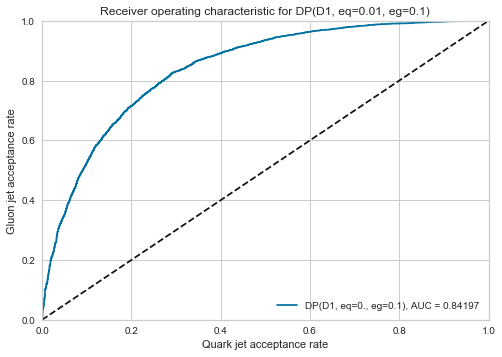

In [253]:
eq4=0.2
eg4=0.2 #if eq=eg=0.3, DP approaches infinity!
Dp4_num = pred_y_1*(-2*eq4+1) + eq4
Dp4_den= pred_y_1*(2*eg4-2*eq4) - eg4+eq4 +1
Dp4=Dp4_num/Dp4_den

fpr_Dp4, tpr_Dp4, thresholds_Dp4  = roc_curve(test_y, Dp4)
roc_auc_Dp4 = auc(fpr_Dp4, tpr_Dp4)

plt.clf()
plt.plot(fpr_Dp4, tpr_Dp4, 'b', label='DP(D1, eq=0., eg=0.1), AUC = %0.5f'% roc_auc_Dp4)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc = 'lower right')
plt.title("Receiver operating characteristic for DP(D1, eq=0.01, eg=0.1)")
plt.ylabel('Gluon jet acceptance rate')
plt.xlabel('Quark jet acceptance rate') #if eq=eg=0.5, AUC=0.5

In [128]:
eq4=0.7
eg4= #if eq=eg=0.3, DP approaches infinity!
Dp4_num = pred_y_1*(-2*eq4+1) + eq4
Dp4_den= pred_y_1*(2*eg4-2*eq4) - eg4+eq4 +1
Dp4=Dp4_num/Dp4_den

fpr_Dp4, tpr_Dp4, thresholds_Dp4  = roc_curve(test_y, Dp4)
roc_auc_Dp4 = auc(fpr_Dp4, tpr_Dp4)

plt.clf()
plt.plot(fpr_Dp4, tpr_Dp4, 'b', label='DP(D1, eq=0.01, eg=0.1), AUC = %0.5f'% roc_auc_Dp4)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc = 'lower right')
plt.title("Receiver operating characteristic for DP(D1, eq=0.01, eg=0.1)")
plt.ylabel('Gluon jet acceptance rate')
plt.xlabel('Quark jet acceptance rate') #if eq=eg=0.5, AUC=0.5

SyntaxError: invalid syntax (<ipython-input-128-4b4e431b5464>, line 2)

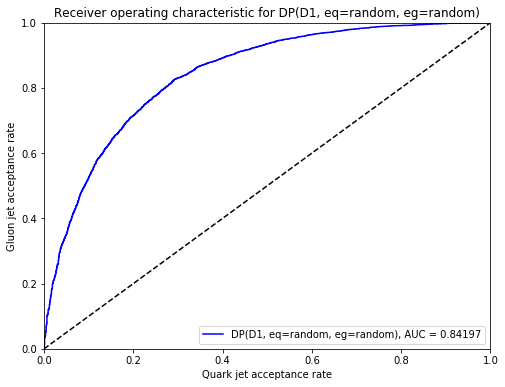

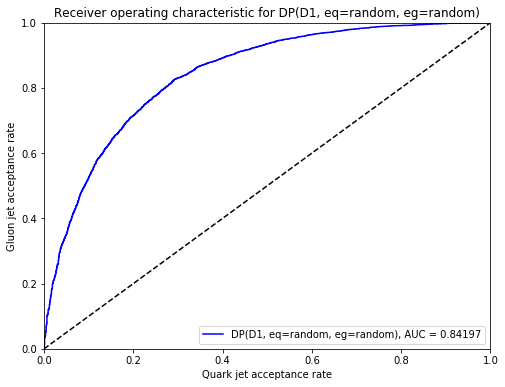

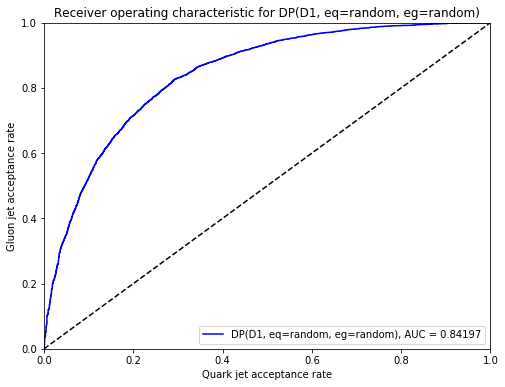

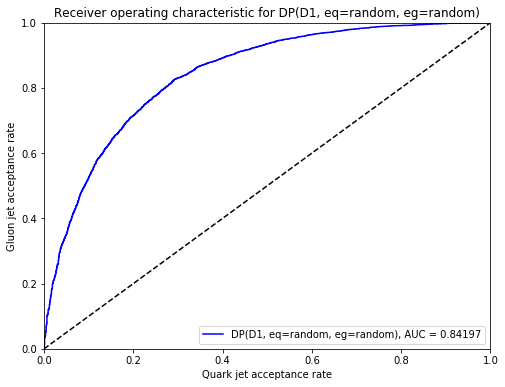

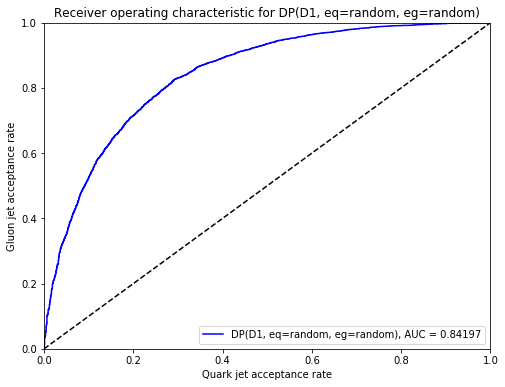

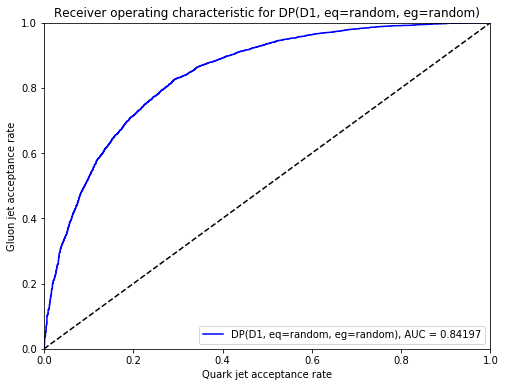

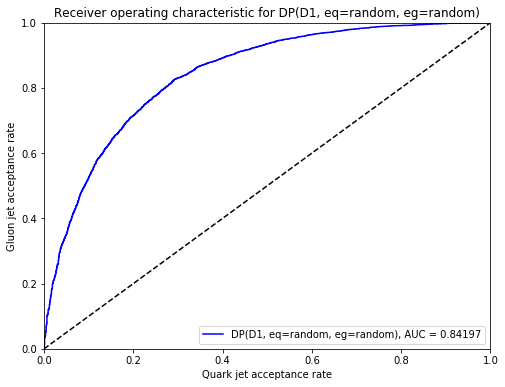

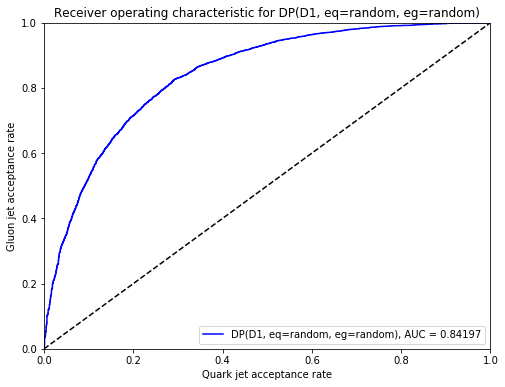

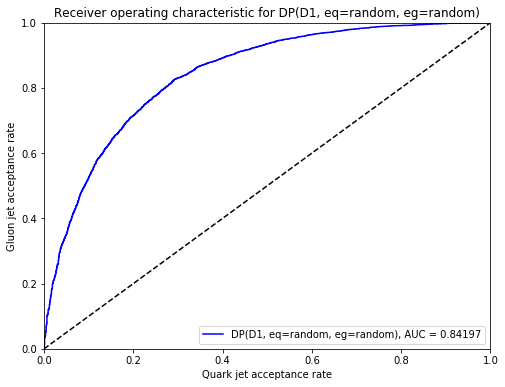

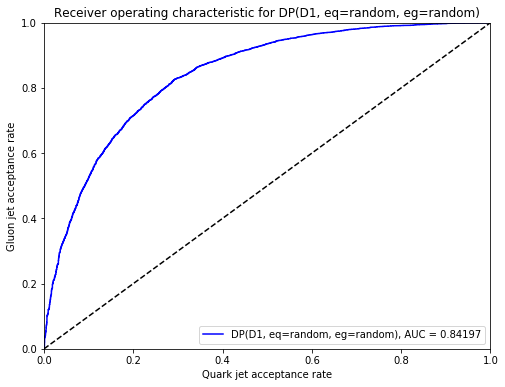

In [129]:
eql = np.linspace(0,0.5,20)
egl=np.linspace(0,0.5,10)
eq=0.2
for eg in np.nditer(egl):
    fig = plt.figure(figsize=(8,6))
    Dpr_num = pred_y_1*(-2*eq+1) + eq
    Dpr_den = pred_y_1*(2*eg-2*eq) - eg+eq +1
    Dpr=Dpr_num/Dpr_den

    fpr_Dpr, tpr_Dpr, thresholds_Dpr  = roc_curve(test_y, Dpr)
    roc_auc_Dpr = auc(fpr_Dpr, tpr_Dpr)

    plt.clf()
    plt.plot(fpr_Dpr, tpr_Dpr, 'b', label='DP(D1, eq=random, eg=random), AUC = %0.5f'% roc_auc_Dpr)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.legend(loc = 'lower right')
    plt.title("Receiver operating characteristic for DP(D1, eq=random, eg=random)")
    plt.ylabel('Gluon jet acceptance rate')
    plt.xlabel('Quark jet acceptance rate') #if eq=eg=0.5, AUC=0.5

In [141]:
model = Sequential()
model.add(Dense(200, kernel_initializer='normal', activation='relu', input_dim=train_x.shape[1]))
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
#model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(optimizer='Nadam', loss='binary_crossentropy', metrics=['accuracy'])

# Weight the training samples so that there is equal weight on gluon and quark jets
# even if there are different amount of them in the training set
#class_weights = class_weight.compute_class_weight('balanced', np.unique(train_y), train_y[:])

# Train the model
model.fit(train_x,
          train_y,
          epochs=20,
          batch_size=128,
          validation_split=0.2,
          shuffle=True,
          verbose=1)

Train on 31285 samples, validate on 7822 samples
Epoch 1/20
31285/31285 [==============================] - 2s 52us/sample - loss: 0.4976 - accuracy: 0.7684 - val_loss: 0.4839 - val_accuracy: 0.7692
Epoch 2/20
31285/31285 [==============================] - 1s 26us/sample - loss: 0.4752 - accuracy: 0.7761 - val_loss: 0.4826 - val_accuracy: 0.7745
Epoch 3/20
31285/31285 [==============================] - 1s 27us/sample - loss: 0.4717 - accuracy: 0.7773 - val_loss: 0.4831 - val_accuracy: 0.7742
Epoch 4/20
31285/31285 [==============================] - 1s 26us/sample - loss: 0.4694 - accuracy: 0.7812 - val_loss: 0.4776 - val_accuracy: 0.7754
Epoch 5/20
31285/31285 [==============================] - 1s 28us/sample - loss: 0.4676 - accuracy: 0.7793 - val_loss: 0.4787 - val_accuracy: 0.7763
Epoch 6/20
31285/31285 [==============================] - 1s 27us/sample - loss: 0.4658 - accuracy: 0.7814 - val_loss: 0.4839 - val_accuracy: 0.7724
Epoch 7/20
31285/31285 [==============================] -

In [142]:
model = Sequential()
model.add(Dense(200, kernel_initializer='normal', activation='relu', input_dim=train_x.shape[1]))
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(optimizer='Nadam', loss='binary_crossentropy', metrics=['accuracy'])

# Weight the training samples so that there is equal weight on gluon and quark jets
# even if there are different amount of them in the training set
#class_weights = class_weight.compute_class_weight('balanced', np.unique(train_y), train_y[:])

# Train the model
model.fit(train_x,
          train_y,
          epochs=20,
          batch_size=128,
          validation_split=0.2,
          shuffle=True,
          verbose=1)

Train on 31285 samples, validate on 7822 samples
Epoch 1/20
31285/31285 [==============================] - 2s 65us/sample - loss: 0.4947 - accuracy: 0.7680 - val_loss: 0.4873 - val_accuracy: 0.7710
Epoch 2/20
31285/31285 [==============================] - 1s 30us/sample - loss: 0.4760 - accuracy: 0.7763 - val_loss: 0.4825 - val_accuracy: 0.7714
Epoch 3/20
31285/31285 [==============================] - 1s 31us/sample - loss: 0.4708 - accuracy: 0.7783 - val_loss: 0.4877 - val_accuracy: 0.7657
Epoch 4/20
31285/31285 [==============================] - 1s 35us/sample - loss: 0.4688 - accuracy: 0.7799 - val_loss: 0.4843 - val_accuracy: 0.7733
Epoch 5/20
31285/31285 [==============================] - 1s 32us/sample - loss: 0.4669 - accuracy: 0.7800 - val_loss: 0.4820 - val_accuracy: 0.7752
Epoch 6/20
31285/31285 [==============================] - 1s 33us/sample - loss: 0.4643 - accuracy: 0.7824 - val_loss: 0.4843 - val_accuracy: 0.7721
Epoch 7/20
31285/31285 [==============================] -

In [143]:
model = Sequential()
model.add(Dense(200, kernel_initializer='normal', activation='relu', input_dim=train_x.shape[1]))
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(optimizer='Nadam', loss='binary_crossentropy', metrics=['accuracy'])

# Weight the training samples so that there is equal weight on gluon and quark jets
# even if there are different amount of them in the training set
#class_weights = class_weight.compute_class_weight('balanced', np.unique(train_y), train_y[:])

# Train the model
model.fit(train_x,
          train_y,
          epochs=20,
          batch_size=128,
          validation_split=0.2,
          shuffle=True,
          verbose=1)

Train on 31285 samples, validate on 7822 samples
Epoch 1/20
31285/31285 [==============================] - 2s 67us/sample - loss: 0.4954 - accuracy: 0.7680 - val_loss: 0.4905 - val_accuracy: 0.7701
Epoch 2/20
31285/31285 [==============================] - 1s 34us/sample - loss: 0.4747 - accuracy: 0.7782 - val_loss: 0.4840 - val_accuracy: 0.7761
Epoch 3/20
31285/31285 [==============================] - 1s 35us/sample - loss: 0.4711 - accuracy: 0.7796 - val_loss: 0.4816 - val_accuracy: 0.7724
Epoch 4/20
31285/31285 [==============================] - 1s 35us/sample - loss: 0.4685 - accuracy: 0.7807 - val_loss: 0.4802 - val_accuracy: 0.7765
Epoch 5/20
31285/31285 [==============================] - 1s 35us/sample - loss: 0.4659 - accuracy: 0.7806 - val_loss: 0.4785 - val_accuracy: 0.7759
Epoch 6/20
31285/31285 [==============================] - 1s 35us/sample - loss: 0.4636 - accuracy: 0.7848 - val_loss: 0.4809 - val_accuracy: 0.7737
Epoch 7/20
31285/31285 [==============================] -

In [146]:
model = Sequential()
model.add(Dense(300, kernel_initializer='normal', activation='relu', input_dim=train_x.shape[1]))
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(optimizer='Nadam', loss='binary_crossentropy', metrics=['accuracy'])

# Weight the training samples so that there is equal weight on gluon and quark jets
# even if there are different amount of them in the training set
#class_weights = class_weight.compute_class_weight('balanced', np.unique(train_y), train_y[:])

# Train the model
model.fit(train_x,
          train_y,
          epochs=20,
          validation_split=0.2,
          shuffle=True,
          verbose=1)

Train on 31285 samples, validate on 7822 samples
Epoch 1/20
31285/31285 [==============================] - 5s 163us/sample - loss: 0.4919 - accuracy: 0.7713 - val_loss: 0.4872 - val_accuracy: 0.7700
Epoch 2/20
31285/31285 [==============================] - 4s 127us/sample - loss: 0.4779 - accuracy: 0.7767 - val_loss: 0.4828 - val_accuracy: 0.7717
Epoch 3/20
31285/31285 [==============================] - 4s 127us/sample - loss: 0.4734 - accuracy: 0.7790 - val_loss: 0.4978 - val_accuracy: 0.7713
Epoch 4/20
31285/31285 [==============================] - 4s 127us/sample - loss: 0.4707 - accuracy: 0.7797 - val_loss: 0.4848 - val_accuracy: 0.7749
Epoch 5/20
31285/31285 [==============================] - 4s 126us/sample - loss: 0.4691 - accuracy: 0.7806 - val_loss: 0.4814 - val_accuracy: 0.7709
Epoch 6/20
31285/31285 [==============================] - 4s 129us/sample - loss: 0.4663 - accuracy: 0.7820 - val_loss: 0.4795 - val_accuracy: 0.7732
Epoch 7/20
31285/31285 [===========================

In [148]:
model = Sequential()
model.add(Dense(300, kernel_initializer='normal', activation='relu', input_dim=train_x.shape[1]))
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(optimizer='Nadam', loss='binary_crossentropy', metrics=['accuracy'])

# Weight the training samples so that there is equal weight on gluon and quark jets
# even if there are different amount of them in the training set
#class_weights = class_weight.compute_class_weight('balanced', np.unique(train_y), train_y[:])

# Train the model
model.fit(train_x,
          train_y,
          epochs=30,
          validation_split=0.2,
          shuffle=True,
          verbose=1)

Train on 31285 samples, validate on 7822 samples
Epoch 1/30
31285/31285 [==============================] - 5s 169us/sample - loss: 0.4931 - accuracy: 0.7707 - val_loss: 0.4865 - val_accuracy: 0.7741
Epoch 2/30
31285/31285 [==============================] - 4s 130us/sample - loss: 0.4782 - accuracy: 0.7757 - val_loss: 0.4799 - val_accuracy: 0.7744
Epoch 3/30
31285/31285 [==============================] - 4s 131us/sample - loss: 0.4747 - accuracy: 0.7759 - val_loss: 0.4779 - val_accuracy: 0.7746
Epoch 4/30
31285/31285 [==============================] - 4s 129us/sample - loss: 0.4712 - accuracy: 0.7781 - val_loss: 0.5022 - val_accuracy: 0.7726
Epoch 5/30
31285/31285 [==============================] - 4s 129us/sample - loss: 0.4691 - accuracy: 0.7800 - val_loss: 0.4801 - val_accuracy: 0.7763
Epoch 6/30
31285/31285 [==============================] - 4s 133us/sample - loss: 0.4671 - accuracy: 0.7803 - val_loss: 0.4811 - val_accuracy: 0.7750
Epoch 7/30
31285/31285 [===========================

In [149]:
model = Sequential()
model.add(Dense(300, kernel_initializer='normal', activation='relu', input_dim=train_x.shape[1]))
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(optimizer='Nadam', loss='binary_crossentropy', metrics=['accuracy'])

# Weight the training samples so that there is equal weight on gluon and quark jets
# even if there are different amount of them in the training set
#class_weights = class_weight.compute_class_weight('balanced', np.unique(train_y), train_y[:])

# Train the model
model.fit(train_x,
          train_y,
          epochs=50,
          validation_split=0.2,
          shuffle=True,
          verbose=1)

Train on 31285 samples, validate on 7822 samples
Epoch 1/50
31285/31285 [==============================] - 6s 187us/sample - loss: 0.4925 - accuracy: 0.7707 - val_loss: 0.4851 - val_accuracy: 0.7729
Epoch 2/50
31285/31285 [==============================] - 5s 156us/sample - loss: 0.4787 - accuracy: 0.7756 - val_loss: 0.4863 - val_accuracy: 0.7719
Epoch 3/50
31285/31285 [==============================] - 4s 137us/sample - loss: 0.4751 - accuracy: 0.7779 - val_loss: 0.4920 - val_accuracy: 0.7675
Epoch 4/50
31285/31285 [==============================] - 4s 136us/sample - loss: 0.4728 - accuracy: 0.7789 - val_loss: 0.4823 - val_accuracy: 0.7751
Epoch 5/50
31285/31285 [==============================] - 4s 137us/sample - loss: 0.4697 - accuracy: 0.7806 - val_loss: 0.4775 - val_accuracy: 0.7759
Epoch 6/50
31285/31285 [==============================] - 4s 136us/sample - loss: 0.4673 - accuracy: 0.7824 - val_loss: 0.4809 - val_accuracy: 0.7741
Epoch 7/50
31285/31285 [===========================

Train on 31285 samples, validate on 7822 samples
Epoch 1/40
31285/31285 [==============================] - 10s 317us/sample - loss: 0.6655 - accuracy: 0.7412 - val_loss: 0.5156 - val_accuracy: 0.7726
Epoch 2/40
31285/31285 [==============================] - 1s 41us/sample - loss: 0.4989 - accuracy: 0.7744 - val_loss: 0.5016 - val_accuracy: 0.7744
Epoch 3/40
31285/31285 [==============================] - 1s 42us/sample - loss: 0.4916 - accuracy: 0.7766 - val_loss: 0.4977 - val_accuracy: 0.7704
Epoch 4/40
31285/31285 [==============================] - 1s 41us/sample - loss: 0.4871 - accuracy: 0.7769 - val_loss: 0.5032 - val_accuracy: 0.7653
Epoch 5/40
31285/31285 [==============================] - 1s 40us/sample - loss: 0.4840 - accuracy: 0.7781 - val_loss: 0.4917 - val_accuracy: 0.7729
Epoch 6/40
31285/31285 [==============================] - 1s 41us/sample - loss: 0.4822 - accuracy: 0.7778 - val_loss: 0.4916 - val_accuracy: 0.7740
Epoch 7/40
31285/31285 [==============================]

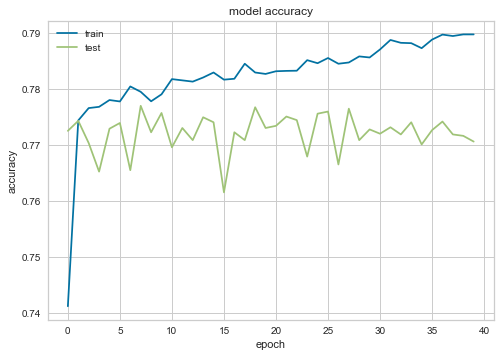

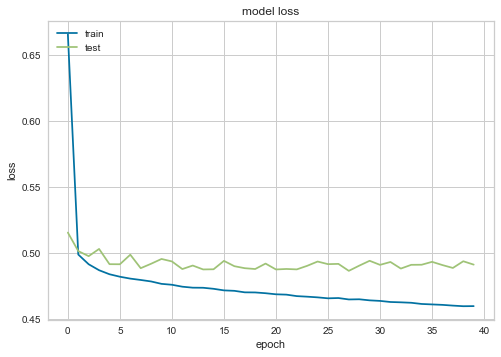

In [224]:
from keras import regularizers
modelb = Sequential()
modelb.add(Dense(100, kernel_initializer='normal', activation='relu', input_dim=train_x.shape[1]))
#model.add(Dropout(0.2))
modelb.add(Dense(200, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01), activation='relu'))
#model.add(Dropout(0.2))
modelb.add(Dense(50, kernel_initializer='normal', activation='relu'))
modelb.add(Dense(200, kernel_initializer='normal',kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01), activation='relu'))
modelb.add(Dense(200, kernel_initializer='normal', activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(50, kernel_initializer='normal', activation='relu'))
modelb.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
modelb.compile(optimizer='Nadam', loss='binary_crossentropy', metrics=['accuracy'])
class_weights = class_weight.compute_class_weight('balanced', np.unique(train_y), train_y[:])



history = modelb.fit(train_x, train_y,  class_weight= class_weights, validation_split=0.2, epochs=40, 
                    batch_size=128, shuffle=True)
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [225]:
pred_y_b = modelb.predict(test_x)
#pd.DataFrame(pred_y_1)

Text(0.5, 0, 'Quark jet acceptance rate')

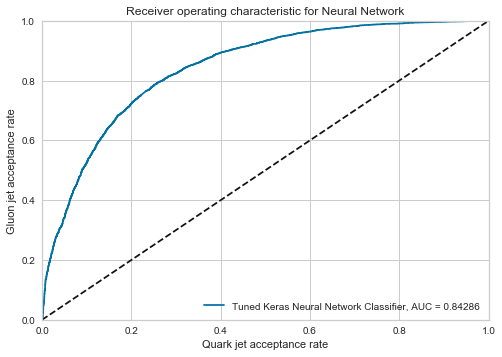

In [226]:
fpr_b, tpr_b, thresholds_b  = roc_curve(test_y, pred_y_b)
roc_auc_b = auc(fpr_b, tpr_b)

plt.clf()
plt.plot(fpr_b, tpr_b, 'b', label='Tuned Keras Neural Network Classifier, AUC = %0.5f'% roc_auc_b)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc = 'lower right')
plt.title("Receiver operating characteristic for Neural Network")
plt.ylabel('Gluon jet acceptance rate')
plt.xlabel('Quark jet acceptance rate')

Text(0.5, 0, 'Quark jet acceptance rate')

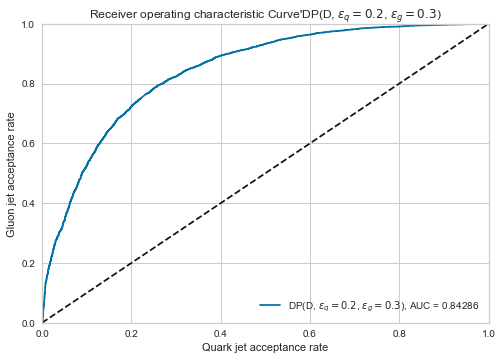

In [234]:
eq5=0.2
eg5= 0.3 #if eq=eg=0.3, DP approaches infinity!
Dp5_num = pred_y_b*(-2*eq5+1) + eq5
Dp5_den= pred_y_b*(2*eg5-2*eq5) - eg5+eq5 +1
Dp5=Dp5_num/Dp5_den

fpr_Dp5, tpr_Dp5, thresholds_Dp5  = roc_curve(test_y, Dp5)
roc_auc_Dp5 = auc(fpr_Dp5, tpr_Dp5)

plt.clf()
plt.plot(fpr_Dp5, tpr_Dp5, 'b', label=r'DP(D, $\epsilon_q=0.2$, $\epsilon_g=0.3$), AUC = %0.5f'% roc_auc_Dp5)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc = 'lower right')
plt.title(r"Receiver operating characteristic Curve'DP(D, $\epsilon_q=0.2$, $\epsilon_g=0.3$)")
plt.ylabel('Gluon jet acceptance rate')
plt.xlabel('Quark jet acceptance rate') #if eq=eg=0.5, AUC=0.5

In [157]:
model = Sequential()
model.add(Dense(200, kernel_initializer='normal', activation='relu', input_dim=train_x.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(200, kernel_initializer='normal', activation='relu'))
#model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(optimizer='Nadam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(train_x, train_y, validation_split=0.3, epochs=20, batch_size=10, verbose=1)
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


AttributeError: module 'tensorflow' has no attribute 'get_default_graph'

In [ ]:
from keras.utils.vis_utils import plot_model
# model = Sequential()
# model.add(Dense(2, input_dim=1, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [216]:
from pycm import Compare

cp = Compare({"Deep Neural Network":cpred_y_1,"Dp":Dp4})
print(cp)


ImportError: cannot import name 'Compare' from 'pycm' (C:\Users\aa18dg\AppData\Local\Continuum\anaconda3\lib\site-packages\pycm\__init__.py)